<a href="https://colab.research.google.com/github/mehdiguel/ML_Projects/blob/main/SerieTemporelle_Part1_MM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Analyse de série temporelle avec Python

In [ ]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
%matplotlib inline

Dans cet tutoriel, nous nous intéressons au cours de l'action ford sur le marché US. Pour ce faire, nous utiliserons la fonction **DataReader** de pandas.

In [ ]:
#### Création d'un data frame avec les valeur de l'action Apple de 2012 jusqu'aujourd'hui
apple = web.DataReader('AAPL', data_source= "yahoo", start = "3/14/2012", end = "30/10/2020" )

On obtient un dataframe de 6 colonnes pour chaque date de cotation (Index).
* **Open** le prix d'ouverture
* **High** le prix le plus haut
* **Low** le prix le plus bas 
* **Close** le prix de clôture de l'action
* **Adj Close** le prix ajusté de clôture (cf ouverture de capital)
* **Volume** qui correspond au nombre d'actions échangé le jour

In [ ]:
apple.head(5)
apple.tail(5) ### 5 dernière valeurs du cours

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-10-23,116.550003,114.279999,116.389999,115.040001,82572600.0,115.040001
2020-10-26,116.550003,112.879997,114.010002,115.050003,111850700.0,115.050003
2020-10-27,117.279999,114.540001,115.489998,116.599998,92276800.0,116.599998
2020-10-28,115.430000,111.099998,115.050003,111.199997,143937800.0,111.199997
2020-10-29,116.930000,112.199997,112.370003,115.320000,143850900.0,115.320000


In [ ]:
apple.shape #### 2173 valeurs pour l'interval choisie

(2173, 6)

In [ ]:
##### Moyenne sur les 100 dernières valeurs pour avoir un ordre d'idée du prix de l'action

import numpy as np 

len(apple.iloc[2073:2173,:]) #### 100 dernières valeurs

np.mean(apple.iloc[2073:2173, :])

High         1.092785e+02
Low          1.059323e+02
Open         1.077608e+02
Close        1.076215e+02
Volume       1.618162e+08
Adj Close    1.075518e+02
dtype: float64

En moyenne sur les 100 dernières valeurs, l'action ford vaut **8.70** dollars.

On crée une nouvelle variable qui correspond aux rangs de l'action dans notre data frame de la plus ancienne à la plus récente. On l'appelera "**Num**".

In [ ]:
apple["Num"] = range(1, len(apple) +1) ##### Incrémente la valeur suivant son rang dans le dataset

In [ ]:
apple[:5]

,High,Low,Open,Close,Volume,Adj Close,Num
Date,,,,,,,
2012-03-14,21.240000,20.549999,20.644644,21.056429,1.418844e+09,18.195688,1
2012-03-15,21.428928,20.662500,21.414642,20.912857,1.159718e+09,18.071619,2
2012-03-16,21.042856,20.642857,20.882856,20.913214,8.254876e+08,18.071930,3
2012-03-19,21.491785,21.037500,21.370358,21.467857,9.012360e+08,18.551216,4
2012-03-20,21.674999,21.124287,21.411072,21.641428,8.166620e+08,18.701204,5


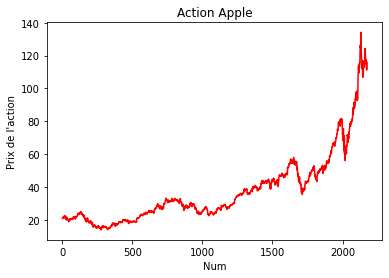

In [ ]:
#### On trace le prix de l'action en fonction du temps

def graph(x,y,data):
    
    """
        Graphique une variable en fonction de l'autre
            Entrée: Nom colonne 1 (x), nom colonne 2 (y) et données (data)
            
            Sortie: Graphique
    """

    graph = data.plot("Num", "Close", legend = False, title = "Action Apple", color = (1,0,0));
    graph.legend = None
    graph.set_ylabel('Prix de l\'action')
    

graph("Num", "Close", apple)

Dans cette partie, on ne sélectionnera qu'un dixième et un vingtième des données:

**10 %** des données:

In [ ]:
#### On ne sélectionne que 10% des données
un_dixieme = apple.sample(frac = .1, random_state = np.random.randint(10))

In [ ]:
#### De la même façon avec 5% des données

un_vingtieme = apple.sample(frac = .05, random_state = np.random.randint(10))

In [ ]:
un_dixieme.head()

,High,Low,Open,Close,Volume,Adj Close,Num
Date,,,,,,,
2015-10-02,27.752501,26.887501,27.002501,27.594999,2.320792e+08,25.500929,895
2013-01-25,16.293928,15.535714,16.131786,15.710000,1.208026e+09,13.696181,218
2015-01-07,27.049999,26.674999,26.799999,26.937500,1.604236e+08,24.581060,709
2015-11-06,30.452499,30.155001,30.277500,30.264999,1.321692e+08,28.088028,920
2017-02-03,32.297501,32.040001,32.077499,32.270000,9.802920e+07,30.615150,1232


PB: Valeur ne sont pas dans l'ordre

In [ ]:
un_dixieme.head()

,High,Low,Open,Close,Volume,Adj Close,Num
Date,,,,,,,
2015-10-02,27.752501,26.887501,27.002501,27.594999,2.320792e+08,25.500929,895
2013-01-25,16.293928,15.535714,16.131786,15.710000,1.208026e+09,13.696181,218
2015-01-07,27.049999,26.674999,26.799999,26.937500,1.604236e+08,24.581060,709
2015-11-06,30.452499,30.155001,30.277500,30.264999,1.321692e+08,28.088028,920
2017-02-03,32.297501,32.040001,32.077499,32.270000,9.802920e+07,30.615150,1232


In [ ]:
#### On enleve l'index de ce data frame

un_dixieme.index.name = None
un_dixieme.head()####Plus le nom de l'index Date

un_vingtieme.index.name = None

In [ ]:
#### On tri les valeurs par Num

un_dixieme = un_dixieme.sort_values(by = ["Num"], ascending = [True])
un_dixieme[["Open", "Close", "Num"]]#### Double crôchet
un_vingtieme = un_vingtieme.sort_values(by = ["Num"], ascending = [True])

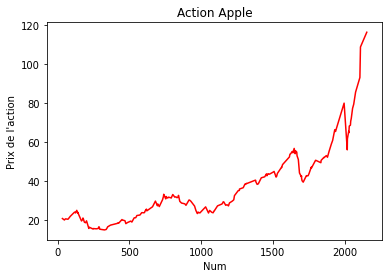

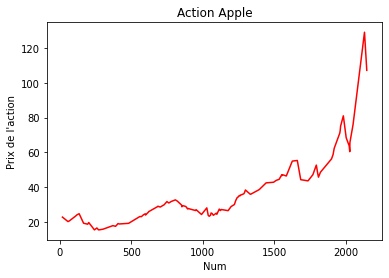

In [ ]:
#### On trace le graphique original par rapport à l'echantillon de données

#### Un dixième
graph("Num", "Close", un_dixieme)

#### Un vingtième
graph("Num", "Close", un_vingtieme)


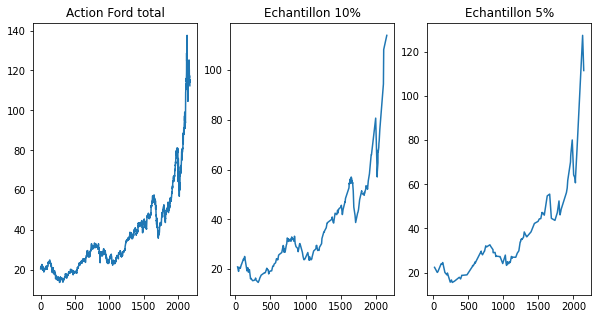

In [ ]:
#### On affiche les deux graphiques en même temps

#### Sous graphique d'une ligne et 2 colonnes


def trois_graph(x, y):
    
    """
        Fonction qui retourne trois graphiques (Action ford, 10% des valeurs aléatoires et 5% des valeurs)
        
        Entrée: Nom de colonne x et y
        
        Sortie: Trois graphiques
    
    """
    #### Une ligne et trois tableaux 
    fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10,5))
    #### Affichage premier tableau 
    axes[0].plot(x, y, data = apple)
    axes[0].set_title("Action Ford total")
    
    #### Affichage second tableau 10%
    axes[1].plot(x, y, data = un_dixieme)
    axes[1].set_title("Echantillon 10%")
    
    #### Affichage troisième tableau 5%
    axes[2].plot(x, y, data = un_vingtieme)
    axes[2].set_title("Echantillon 5%")


trois_graph("Num", "Open" ) #### Appel de la fonction

In [ ]:
#### Modification de l'index pour que ce soit la variable "Num"

apple = apple.reset_index()
apple.head(3)

# apple.index = apple["Num"]
# apple

,Date,High,Low,Open,Close,Volume,Adj Close,Num
0,2012-03-14,21.240000,20.549999,20.644644,21.056429,1.418844e+09,18.195688,1
1,2012-03-15,21.428928,20.662500,21.414642,20.912857,1.159718e+09,18.071619,2
2,2012-03-16,21.042856,20.642857,20.882856,20.913214,8.254876e+08,18.071930,3


On génère une moyenne mobile avec une fenètre de 80 cotations. On place les résultats dans la colonne "**Moyenne mobile**".

In [ ]:
#### Moyenne mobile 

#### Moyenne mobile à fenètre de 40
apple["Moyenne_Mobile"] = apple["Close"].rolling(window =60).mean()

apple[["Close", "Moyenne_Mobile"]].tail(5) #### 5 dernières colonnes de notre dataset

#apple

,Close,Moyenne_Mobile
2168,115.040001,116.354083
2169,115.050003,116.500583
2170,116.599998,116.628291
2171,111.199997,116.653875
2172,115.320000,116.741500


In [ ]:
##On trace les 4 graphiques cote à cote.

Text(0.5, 1.0, 'Moyenne Mobile à 40 cotations')

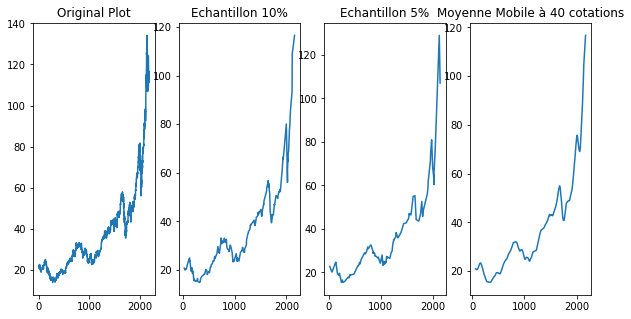

In [ ]:
#### On affiche les 4 graphiques en même temps

#### Sous graphique d'une ligne et 2 colonnes
fig, axes = plt.subplots(nrows = 1, ncols = 4, figsize = (10,5))

axes[0].plot("Num", "Close", data = apple)
axes[0].set_title("Original Plot")
axes[1].plot("Num", "Close", data = un_dixieme)
axes[1].set_title("Echantillon 10%")
axes[2].plot("Num", "Close", data = un_vingtieme)
axes[2].set_title("Echantillon 5%")
axes[3].plot("Num", "Moyenne_Mobile", data = apple)
axes[3].set_title("Moyenne Mobile à 40 cotations")

La moyenne mobile semble bien fitter les graphiques précedents. Qu'en est t-il si nous les superposons?

In [ ]:
##### On affiche les données originale et les données lissée sur le même graphique


def sup_graph(x, y1, y2):
    """
        Entrée: Nombre de cotation(x), prix moyenne mobile (y1), prix high (y2)
        
        Sortie: Graphique
    
    """
    fig = plt.figure()
    ax = fig.add_subplot(111);
    #### Graphique 1: Moyenne mobile
    ax.plot(apple[x], apple[y1], color = (0,0,0), linewidth = 4, alpha =.9, label = "Lissé MM")
    
    #### Graphique 2: Plus haut de cotation
    ax.plot(apple[x], apple[y2], color = (1,0,0), label = "Original")

    ax.set_title('Les données originales et lissées')

    ax.set_xlabel('Num')
    ax.set_ylabel("Prix")
    ax.legend(loc = "lower right")

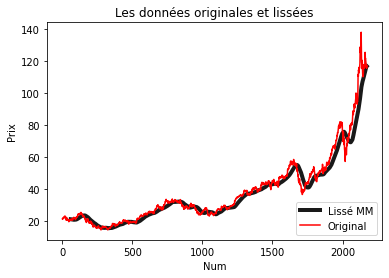

In [ ]:
sup_graph("Num", "Moyenne_Mobile", "High")

Le même code mais avec les dates en abscisses:

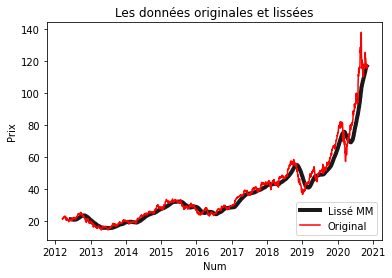

In [ ]:
sup_graph("Date", "Moyenne_Mobile", "High")

On prendra ici les cotations entre 200 et 400.

In [ ]:
#### Date a partir de decembre 2019

In [ ]:
Num_apple = apple[(apple["Num"] >= 1943) ]

In [ ]:
Num_apple[:10]

,Date,High,Low,Open,Close,Volume,Adj Close,Num,Moyenne_Mobile
1942,2019-12-02,67.062500,65.862503,66.817497,66.040001,94487200.0,65.587517,1943,60.185958
1943,2019-12-03,64.882500,64.072502,64.577499,64.862503,114430400.0,64.418091,1944,60.374625
1944,2019-12-04,65.827499,65.169998,65.267502,65.434998,67181600.0,64.986664,1945,60.562292
1945,2019-12-05,66.472504,65.682503,65.947502,66.394997,74424400.0,65.940086,1946,60.737250
1946,2019-12-06,67.750000,66.824997,66.870003,67.677498,106075600.0,67.213799,1947,60.935667
1947,2019-12-09,67.699997,66.227501,67.500000,66.730003,128042400.0,66.272789,1948,61.136375
1948,2019-12-10,67.517502,66.464996,67.150002,67.120003,90420400.0,66.660126,1949,61.338792
1949,2019-12-11,67.775002,67.125000,67.202499,67.692497,78756800.0,67.228699,1950,61.547417
1950,2019-12-12,68.139999,66.830002,66.945000,67.864998,137310400.0,67.400017,1951,61.750292
1951,2019-12-13,68.824997,67.732498,67.864998,68.787498,133587600.0,68.316193,1952,61.976083


Dans cette partie, on cherchera à prédire notre moyenne mobile à l'aide d'une régression linéaire

In [ ]:
#### Regression Linéaire

from sklearn.linear_model import LinearRegression

#### fit(X,y)

#### On cherche a predire une moyenne mobile

model = LinearRegression().fit(Num_apple[["Close"]], Num_apple[["Moyenne_Mobile"]])



m = model.coef_[0]
b = model.intercept_


#### Equation de la ligne

print("y=", round(m[0], 4), "x +", round(b[0],4)) ##### Equation de la droite

y= 0.7234 x + 17.4788


<math>
Y = X \beta + \epsilon
</math>

In [ ]:
#### Prédiction de la moyenne mobile du cours d'ouverture

prediction = model.predict(Num_apple[["Moyenne_Mobile"]])
prediction[:10]

array([[61.0150739 ],
       [61.15154831],
       [61.2872993 ],
       [61.41385755],
       [61.55738469],
       [61.70256959],
       [61.84899024],
       [61.9999017 ],
       [62.1466538 ],
       [62.30998296]])

In [ ]:
##### On crée un nouveau data frame avec les valeurs prédites
prediction = pd.DataFrame(data = prediction, index = Num_apple.index.values, columns = ["Pred"])

prediction.head(5)  #### Affichage des 5 valeurs

,Pred
1942,61.015074
1943,61.151548
1944,61.287299
1945,61.413858
1946,61.557385


In [ ]:
#### Jointure de la prediction avec l'ancienne table
jointure = Num_apple.join(prediction, how = "inner") 
jointure.head(5)

,Date,High,Low,Open,Close,Volume,Adj Close,Num,Moyenne_Mobile,Pred
1942,2019-12-02,67.062500,65.862503,66.817497,66.040001,94487200.0,65.587517,1943,60.185958,61.015074
1943,2019-12-03,64.882500,64.072502,64.577499,64.862503,114430400.0,64.418091,1944,60.374625,61.151548
1944,2019-12-04,65.827499,65.169998,65.267502,65.434998,67181600.0,64.986664,1945,60.562292,61.287299
1945,2019-12-05,66.472504,65.682503,65.947502,66.394997,74424400.0,65.940086,1946,60.737250,61.413858
1946,2019-12-06,67.750000,66.824997,66.870003,67.677498,106075600.0,67.213799,1947,60.935667,61.557385


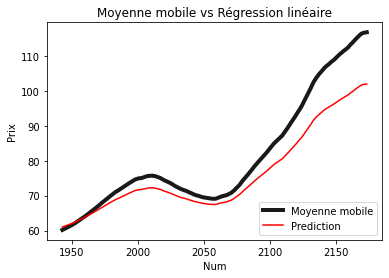

In [ ]:
#### Affichage de la moyenne mobile et de la prédiction

fig = plt.figure()
ax =fig.add_subplot(111)
#### La variable d'ouverture
ax.plot(jointure["Num"], jointure["Moyenne_Mobile"], color = (0,0,0), linewidth = 4, alpha = .9,label = "Moyenne mobile")
#### La prédiction
ax.plot(jointure["Num"], jointure["Pred"], color = (1,0,0), label = "Prediction")
ax.set_title("Moyenne mobile vs Régression linéaire")
ax.set_xlabel("Num")
ax.set_ylabel("Prix")
ax.legend(loc="lower right")

In [ ]:
import sklearn

r_carre = sklearn.metrics.r2_score(jointure["Moyenne_Mobile"],jointure["Pred"], multioutput = "uniform_average")
r_carre

0.8279927292833754

R_carre faible